Load dependencies

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd

Set settings and constants

In [2]:
sc.settings.set_figure_params(dpi=50, facecolor="white")
DATA_DIR = '/data/BIOL5177/Assessment'
SAMPLES = ['Infected1','Infected2','WT1']

Load in the data

In [3]:
# Returns an AnnData object which
def load_count_data_csv(data_dir, samples, counts_matrix = 'counts_matrix.csv', metadata = 'metadata.csv'):
    adata_dict = {}
    for sample_id in samples:
        print(sample_id)
        filepath = f'{data_dir}/{sample_id}/{counts_matrix}'
        a_filepath = f'{DATA_DIR}/WT1/{metadata}'
        counts_adata = sc.read(filepath)
        counts_adata = counts_adata.transpose()
        counts_adata.var_names_make_unique()
        
        #anno = pd.read_csv(a_filepath)
        #counts_adata.obs['nCount_RNA'] = anno['nCount_RNA']
        #counts_adata.obs['nFeature_RNA'] = anno['nFeature_RNA']
        #sample_adata.obs_names_make_unique()
        adata_dict[sample_id] = counts_adata
    
    adata = ad.concat(adata_dict, label="sample")
    #adata.obs_names_make_unique()
    
    return adata
    
    #return adata_dict

adata = load_count_data_csv(DATA_DIR, SAMPLES)


Infected1
Infected2
WT1


Calculate QC metrics

In [10]:
adata.var["mt"] = adata.var_names.str.startswith("Mt")
sc.pp.calculate_qc_metrics(adata,qc_vars=["mt"], inplace=True, log1p=True)

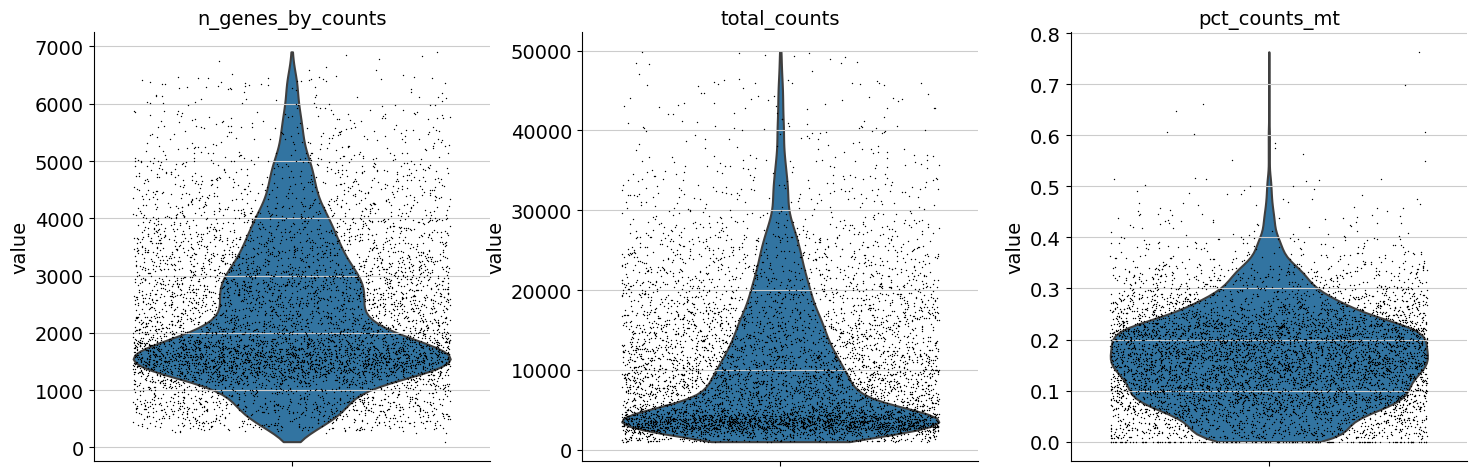

In [11]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

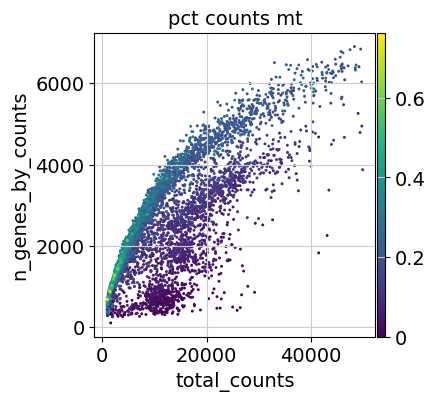

In [12]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

Filter

In [16]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_cells(adata, max_genes=2500)
sc.pp.filter_genes(adata, min_cells=3)

Normalise data

In [23]:
adata.layers["counts"] = adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize
sc.pp.log1p(adata)

Feature selection

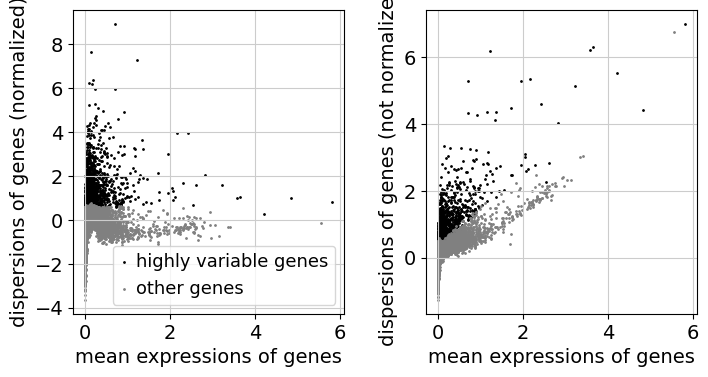

In [32]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")
sc.pl.highly_variable_genes(adata)

Scale data

In [35]:
sc.pp.scale(adata)

PCA

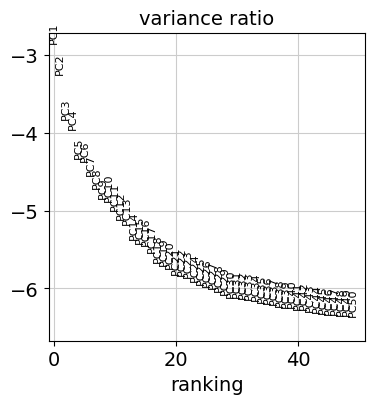

In [39]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


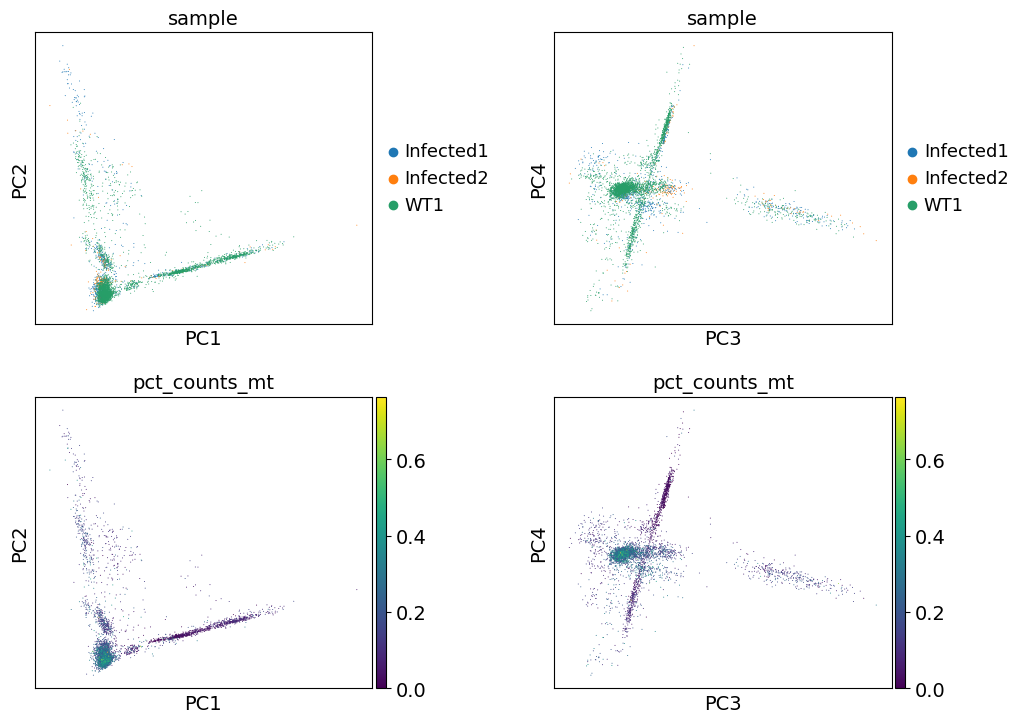

In [43]:
sc.pl.pca(
    adata,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
    wspace=0.4,
)

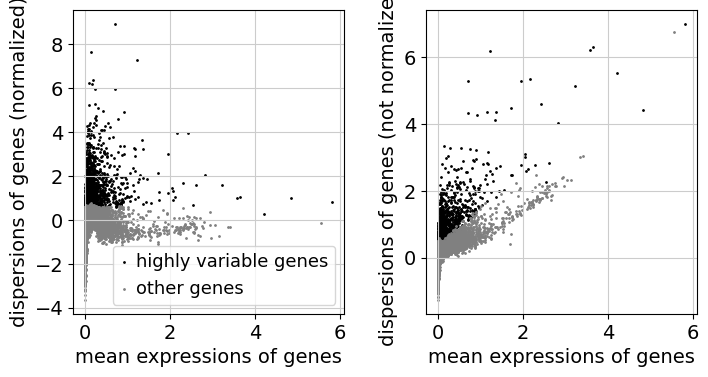